In [160]:
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [120]:
df = pd.read_pickle('data/cleaned_data.pkl')
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,explanation why the edits made under my userna...,0,0,0,0,0,0
1,000103f0d9cfb60f,d aww he matches this background colour i am s...,0,0,0,0,0,0
2,000113f07ec002fd,hey man i am really not trying to edit war it ...,0,0,0,0,0,0
3,0001b41b1c6bb37e,more i can not make any real suggestions on im...,0,0,0,0,0,0
4,0001d958c54c6e35,you sir are my hero any chance you remember wh...,0,0,0,0,0,0


In [121]:
labels = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

In [122]:
train, test = train_test_split(df, test_size=0.33, random_state=42, shuffle=True)

In [123]:
train.shape, test.shape

((106912, 8), (52659, 8))

In [124]:
X_train = train['comment_text']
X_test = test['comment_text']

### Machine Learning Pipeline

In [125]:
accuracies = [[],[],[]]

#### Multinomial Naive Bayes

In [126]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer

vec = TfidfVectorizer(stop_words='english')
model1 = MultinomialNB()

In [127]:
X_train = vec.fit_transform(X_train)
X_test = vec.transform(X_test)

In [128]:
for category in labels:
    model1.fit(X_train, train[category])
    accuracy = model1.score(X_test, test[category])
    accuracies[0].append(accuracy)
    print("Accuracy For {0} Class Is {1}%".format(category,round(accuracy*100,2)))

Accuracy For toxic Class Is 92.14%
Accuracy For severe_toxic Class Is 99.0%
Accuracy For obscene Class Is 95.25%
Accuracy For threat Class Is 99.71%
Accuracy For insult Class Is 95.2%
Accuracy For identity_hate Class Is 99.1%


#### Linear Support Vector Classifier

In [129]:
from sklearn.svm import LinearSVC
model2 = LinearSVC()
for category in labels:
    model2.fit(X_train, train[category])
    accuracy = model.score(X_test, test[category])
    accuracies[1].append(accuracy)
    print("Accuracy For {0} Class Is {1}%".format(category,round(accuracy*100,2)))

Accuracy For toxic Class Is 90.52%
Accuracy For severe_toxic Class Is 98.95%
Accuracy For obscene Class Is 94.72%
Accuracy For threat Class Is 99.53%
Accuracy For insult Class Is 95.09%
Accuracy For identity_hate Class Is 99.19%


#### Logistic Regression Classifier

In [130]:
from sklearn.linear_model import LogisticRegression
model3 = LogisticRegression(n_jobs=1, solver='liblinear')
for category in labels:
    model3.fit(X_train, train[category])
    accuracy = model.score(X_test, test[category])
    accuracies[2].append(accuracy)
    print("Accuracy For {0} Class Is {1}%".format(category,round(accuracy*100,2)))

Accuracy For toxic Class Is 90.52%
Accuracy For severe_toxic Class Is 98.95%
Accuracy For obscene Class Is 94.72%
Accuracy For threat Class Is 99.53%
Accuracy For insult Class Is 95.09%
Accuracy For identity_hate Class Is 99.19%


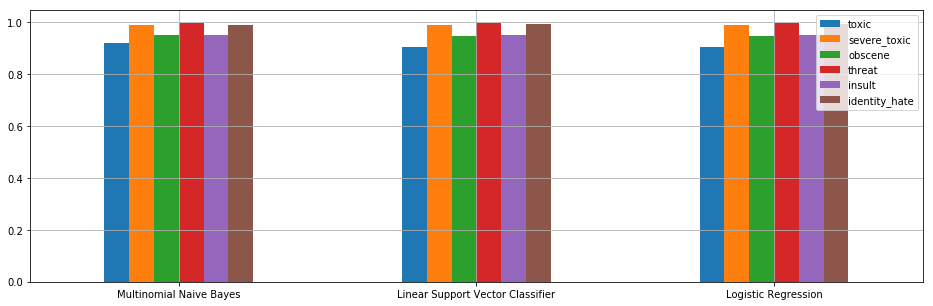

In [190]:
accuracies = pd.DataFrame(accuracies)
fig = accuracies.plot.bar(figsize=(16, 5), grid=True)
plt.xticks(np.arange(3),('Multinomial Naive Bayes','Linear Support Vector Classifier','Logistic Regression'),rotation=0)
plt.legend(labels)
plt.show()

In [227]:
for i in range(3):
    print("Model -",i,"... Aggregate Accuracy -",np.mean(accuracies.iloc[i,:]))

Model - 0 ... Aggregate Accuracy - 0.9673560075200821
Model - 1 ... Aggregate Accuracy - 0.9633237749799021
Model - 2 ... Aggregate Accuracy - 0.9633237749799021


> Thus, we can see that model0 performs best overall by a very slight margin. It is a **multinomial naive bayes classifier**.